<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Работа-с-пропущенными-значениями" data-toc-modified-id="Работа-с-пропущенными-значениями-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с пропущенными значениями</a></span></li><li><span><a href="#Преобразования-типов-данных" data-toc-modified-id="Преобразования-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразования типов данных</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li><li><span><a href="#Работа-с-аномальными-значениями" data-toc-modified-id="Работа-с-аномальными-значениями-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Работа с аномальными значениями</a></span></li></ul></li><li><span><a href="#Фич-инжиниринг" data-toc-modified-id="Фич-инжиниринг-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Фич-инжиниринг</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Описание-параметров" data-toc-modified-id="Описание-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Описание параметров</a></span></li><li><span><a href="#Анализ-сроков-продажи-недвижимости" data-toc-modified-id="Анализ-сроков-продажи-недвижимости-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ сроков продажи недвижимости</a></span></li><li><span><a href="#Влияние-факторов-на-общую-(полную)-стоимость-объекта" data-toc-modified-id="Влияние-факторов-на-общую-(полную)-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние факторов на общую (полную) стоимость объекта</a></span></li><li><span><a href="#Средняя-цена-одного-квадратного-метра-в-ТОП-10-населённых-пунктов" data-toc-modified-id="Средняя-цена-одного-квадратного-метра-в-ТОП-10-населённых-пунктов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя цена одного квадратного метра в ТОП-10 населённых пунктов</a></span></li><li><span><a href="#Средняя-цена-недвижимости-в-Санкт-Петербурге-на-каждом-километре" data-toc-modified-id="Средняя-цена-недвижимости-в-Санкт-Петербурге-на-каждом-километре-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Средняя цена недвижимости в Санкт-Петербурге на каждом километре</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цель исследования** - научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Ход исследования**

Данные о поведении пользователей мы получили из файла `real_estate_data.csv`. На этапе предобработки выявим в них возможные проблемы (некорректные типы данных, аномалии, пропуски, дубликаты) и выберем оптимальные решения для их устранения. Обогатим данные дополнительными признаками. Проанализируем подготовленные данные, определим факторы, влияющие на стоимость жилья. Подведём итоги работы. 
 
Таким образом, исследование пройдёт в пять этапов:
 1. Обзор данных
 2. Предобработка данных
 3. Фич-инжиниринг
 4. Исследовательский анализ данных
 5. Общий вывод

### Обзор данных 

In [1]:
# импортируем библиотеку pandas
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore', message='Mean of empty slice')

In [2]:
# читаем csv-файл
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv(r'C:\Users\Natal\Downloads\real_estate_data.csv', sep='\t')

In [3]:
# Выведем первые 5 строчек датафрейма data на экран
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Первое, что бросается в глаза - данные содержат большое кол-во пропусков. Ниже рассмотрим их подробнее.

In [4]:
# Выведем основную информацию о датафрейме с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.loc[data['total_area'] < (data['living_area'] + data['kitchen_area'])][['total_area','living_area','kitchen_area']]

,total_area,living_area,kitchen_area
184,30.20,26.10,6.20
545,23.80,20.00,5.00
551,31.59,30.55,9.28
601,53.70,48.30,7.00
696,34.69,23.43,23.43
...,...,...,...
21824,44.00,38.00,8.60
21868,34.30,30.60,8.00
21915,91.40,62.00,32.40
21956,46.00,44.00,8.00


В датасете содержатся 23699 строк, 22 столбца.
Типы данных по столбцам: 2 - булев тип, 3 - вещественные  числа, 3 - целые числа, 3 - объект.
Из 3-х столбцов типа object, один first_day_exposition (дата публикации) явно должен быть datetime, is_apartment (апартаменты) имеет булев тип.
Следующие столбцы: floors_total (всего этажей в доме), balcony (число балконов), parks_around3000 (число парков в радиусе 3 км), ponds_around3000 (число водоёмов в радиусе 3 км), days_exposition (сколько дней было размещено объявление) - имеют тип вещественных  чисел, хотя содержат целочисленные значения.
Тип даных в остальных столбцах распознан верно.

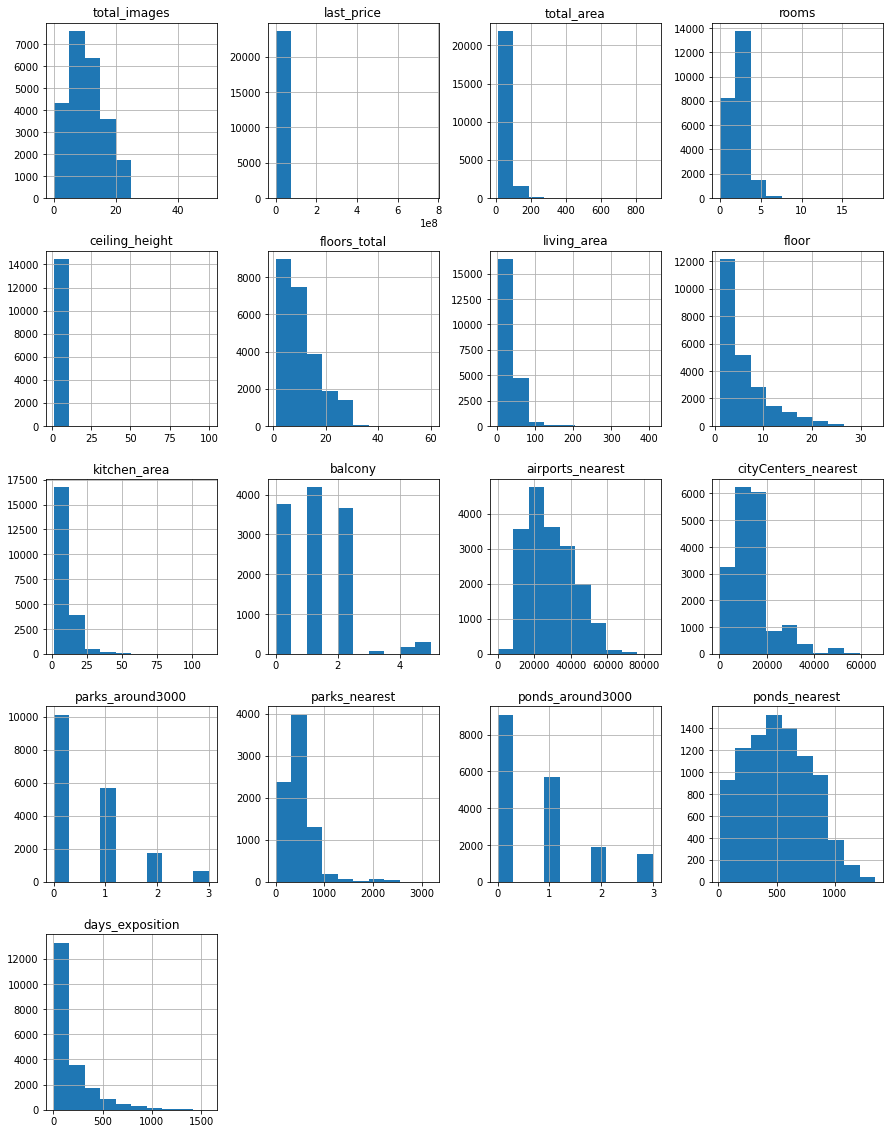

In [6]:
# Построим гистограммы для всех числовых столбцов датасета
data.hist(figsize=(15, 20));

Из полученных гистограмм можно сделать следующие выводы:
- total_images - по всем объектам недвижимости максимальное кол-во фото 25 шт, в среднем 5-10 шт
- last_price - из-за наличия выбросов оценить распределение ценовых диапозонов невозможно, потребуется более детальный график
- total_area - 1,5к квартир имеют общую площадь 100 - 200 м, 22к с площадью до 100 м
- rooms - больше всего предложений (~14к) на квартиры с 3 - 4-мя комнатами, не более 2-х комнат ~8к, больше 4-х комнат (менее 2к)
- ceiling_height - из-за наличия выбросов оценить распределение ценовых диапозонов невозможно, потребуется более детальный график
- floors_total - больше всего предложений (~8,5к) на малоэтажки не более 6-ти этажей, 6-12 этажей ~6,8к, 12-18 этажей ~3,9к, 18-24 этажей ~1,9к, более 24 этажей ~3,9к
- living_area - наибольшее кол-во квартир(~15,5к) имеют жилую площадь до 42 м2, ~4,9к с площадью 42-85 м и более 85 м ~0,5к
- floor - с учетом преобладания предложений на квартиры из малоэтажных домах, логично, что и наибольшая часть квартир находятся не на высоких этажах ~12,1к не выше 4-ого этажа, ~5,1к на 4-7 этажах, ~3к на 8-11 этажах и примерно столько же выше 11 этажа
- kitchen_area - ~17к квартир имеют кухни площадью до 12,5 м2, ~3,8к квартир 12,5-24 м2 и в ~0,5к квартир кухни большей площади
- balcony - без балкона ~3,8к квартир, с одним балконом ~4,2к, с 2-мя ~3,7к, менее 0,1к с 3-мя балконами и 4, 5 балконов в ~0,2к и ~0,3к соответственно
- airports_nearest - наибольшее число квартир(~4,8к) находятся на расстоянии 17-25,5 км от аэропорта, ~3,7к удалены на 25,5-34 км, почти столько же на 9-17 км, ~3,1к находятся на расстоянии 34-42,5 км, ближе всего к аэропорту (до 9 км) ~0,15к, квартир, находящихся дальше 42,5 км ~3к
- cityCenters_nearest - наибольшее число квартир(~6,3к) находятся на расстоянии 7-13,5 км от центра, ~6к удалены на 13,5-20 км,   ближе всего центру (до 7 км) ~3,3к квартир, дальше 20 км ~2,6к 
- parks_around3000 - наибольшее число предложений (~10к) на квартиры, в радиусе 3 км от которых, нет парков, ~5,7к с одним парком, ~1,8к с 2-мя парками, ~0,6к - с 3-мя 
- parks_nearest - среди квартир, в радиусе 3 км от которых, есть парки наибольшее число предложений (~4к) с удалённостью 300-600 м, ~2,3к не дальше 300 м, ~1,3к на расстоянии 600-900 м, дальше 900 м ~0,5к
- ponds_around3000 - наибольшее число предложений (~8,7к) на квартиры, в радиусе 3 км от которых, нет водоёмов, ~5,8к с одним водоёмом, ~1,9к с 2-мя водоёмами, ~1,7к - с 3-мя 
- ponds_nearest - среди квартир, в радиусе 3 км от которых, есть водоёмы с удалённостью до 140 м ~0,9к, ~1,2к квартир расположены от водоёма(-ов) на расстоянии 140-270 м, ~1,3к на 270-400 м, ~1,5к на 400-530 м, ~1,4к на 530-660 м, ~1,15к на 660-790 м, ~1к на 790-920 м,  дальше 920 м, но не дальше 1,5 км ~0,6к
- days_exposition - наибольшее число квартир(~13,3к) были проданы в течение 160 дней с момента публикации, ~3,6к в срок 160-320 дней, ~1,8к в период 320-480 дней и примерно столько же квартир вплоть до 1600 дней


### Предобработка данных

#### Анализ данных

In [7]:
# детальнее изучим столбцы с прoпущенными значениями
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# выведем процент пропущенных значений с округлением
print(round((data.isna().sum())*100/len(data), 2))

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64


In [9]:
# С помощью функции describe оценим распределение значений в столбцах с числовым типом данных 
# (информация потребуется при работе с прорусками и аномалиями)
round(data.describe(percentiles=[0.005, 0.25, 0.5, 0.75, 0.95]), 2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.541549e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.088701e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
0.5%,0.00,8.000000e+05,23.50,0.00,2.50,2.00,11.20,1.00,5.00,0.00,7659.00,1070.90,0.00,17.00,0.00,29.00,3.00
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.800000e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
95%,20.00,1.530000e+07,116.00,4.00,3.30,25.00,69.00,16.00,20.00,2.00,51340.00,31671.60,2.00,968.00,3.00,976.55,647.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


#### Работа с пропущенными значениями

Вероятнее всего, если нет явного указания в данных, что недвижимость является апартаментами,
то пропущенные значения в соответствующем столбце правильно заменить на ложные (апартаментами не является)

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)

В вариантах, где не указано кол-во балконов скорее всего их нет, поэтому заменим пропуски на 0

In [11]:
data['balcony'] = data['balcony'].fillna(0)

В столбце расстояние до парка содержится большое кол-во пропущенных значений 15620, при этом столбец с кол-вом парков в радиусе 3 км имеет всего 5518 пропусков. Проверим, присутствуют ли пропущенные значения в столбце с расстоянием до парка у объектов недвижимости, не имеющих парков в радиусе 3 км. 

In [12]:
# Выведем объекты недвижимости, не имеющие парков в радиусе 3 км, но с пропусками в столбце с расстоянием до парка 
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,False,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,...,15.6,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,False,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,False,...,15.0,0.0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


Кол-во объектов недвижимости, где нет парков и в столбце parks_nearest пропущенные значения - 10102.
Проставим для них нулевые расстояния

In [13]:
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'].isna()), 'parks_nearest'] = 0.0

В столбце расстояние до водоёма содержится большое кол-во пропущенных значений 14589, при этом столбец с кол-вом водоёмов в радиусе 3 км имеет всего 5518 пропусков. Проверим, присутствуют ли пропущенные значения в столбце с расстоянием до водоёма у объектов недвижимости, не имеющих водоёмов в радиусе 3 км.

In [14]:
# Выведем объекты недвижимости, не имеющие водоёмов в радиусе 3 км, но с пропусками в столбце с расстоянием до водоёма 
data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,False,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,False,...,15.6,0.0,Санкт-Петербург,11827.0,11459.0,0.0,0.0,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,False,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,0.0,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,False,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,0.0,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,False,...,15.0,0.0,Санкт-Петербург,15632.0,14428.0,0.0,0.0,0.0,NaN,23.0


Кол-во объектов недвижимости, где нет парков и в столбце parks_nearest пропущенные значения - 9071. Проставим для них нулевые расстояния

In [15]:
data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = 0.0

Для устранения пропущенных значений в столбцах с расстоянием до ближайшего аэропорта/центра города в метрах лучше всего подойдёт определение локаций недвижимости в привязке к названию населённого пункта

In [16]:
# В цикле проходимся по уникальным названиям населённых пунктов и заполняем пропуски
# в столбцах с расстоянием до ближайшего аэропорта медианными значениями по каждому населённому пункту
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == i) & (data['airports_nearest'].isna() == False), 'airports_nearest'].median()

In [17]:
# В цикле проходимся по уникальным названиям населённых пунктов и заполняем пропуски
# в столбцах с расстоянием до центра города медианными значениями по каждому населённому пункту
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['locality_name'] == i) & (data['cityCenters_nearest'].isna() == False), 'cityCenters_nearest'].median()

Чтобы заполнить пропуски в столбцах жилая площадь и площадь кухни наиболее оптимально будет использовать коэффициенты для каждого типа недвижимости, отражающие отношения этих величин к общей площади

Сначала рассчитаем коэффициент - соотношение площадей жилой к общей для квартир-студий

In [18]:
coef_stud_liv = data.loc[(data['studio']) & (data['living_area'].isna() == False), 'living_area']/ \
data.loc[(data['studio']) & (data['living_area'].isna() == False), 'total_area']

Заполним пропуски в жилых площадях квартир-студий, применив медианное значение коэффициента, т.е. умножив на него общую площадь

In [19]:
data.loc[(data['studio']) & (data['living_area'].isna()), 'living_area'] = \
data.loc[(data['studio']) & (data['living_area'].isna()), 'living_area']. \
fillna(data.loc[(data['studio']) & (data['living_area'].isna()), 'total_area'] * coef_stud_liv.median())

Пропуски в площадях кухонь квартир-студий заполняем нулевым значением, поскольку данный тип квартир подразумевает единое пространство

In [20]:
data.loc[(data['studio']) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
data.loc[(data['studio']) & (data['kitchen_area'].isna()), 'kitchen_area'].fillna(0)

Для квартир, не являющихся студиями, коэффициент - соотношение площадей жилой к общей будем рассчитывать, исходя из кол-ва комнат

Но предварительно выясним, корректно ли был заполнен столбец с кол-вом комнат у квартир-студий. 

In [21]:
# Выведем уникальные значения с подсчётом  в столбце с кол-вом комнат для квартир-студий
data.loc[data['studio'], 'rooms'].value_counts()

0    138
1     11
Name: rooms, dtype: int64

Ожидаемо, что в части объявлений студиям проставили по комнатам единицу, как у однокомнатных квартир. Необходимо произвести замену на ноль.

In [22]:
data.loc[(data['studio']) & (data['rooms'] == 1), 'rooms']  = \
data.loc[(data['studio']) & (data['rooms'] == 1), 'rooms'].replace(1,0)

In [23]:
# В цикле проходимся по уникальным значениям столбца с кол-вом комнат и заполняем пропуски в столбце жилой площади,
# применив медианные значения коэффициентов (в зависимости от кол-ва комнат), т.е. умножив на них общие площади квартир
for i in data['rooms'].unique():
    coef = data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['living_area'].isna() == False), 'living_area'] / \
    data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['total_area'].isna() == False), 'total_area']
    data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['living_area'].isna()), 'living_area'] \
    .fillna(data.loc[(data['rooms'] == i) & (data['studio'] == False), 'total_area'] * coef.median())
    print(f'количество комнат: {i}, коэффициент: {coef.median()}')

количество комнат: 3, коэффициент: 0.6316666666666666
количество комнат: 1, коэффициент: 0.48235294117647054
количество комнат: 2, коэффициент: 0.5850091407678245
количество комнат: 4, коэффициент: 0.6597402597402597
количество комнат: 5, коэффициент: 0.6518423782149324
количество комнат: 6, коэффициент: 0.6794117647058824
количество комнат: 0, коэффициент: 0.6844802342606149
количество комнат: 7, коэффициент: 0.6816702819956616
количество комнат: 11, коэффициент: 0.7100928114264657
количество комнат: 8, коэффициент: 0.6884754302364403
количество комнат: 14, коэффициент: 0.6486946594192649
количество комнат: 10, коэффициент: 0.6531034482758621
количество комнат: 15, коэффициент: 0.6932203389830508
количество комнат: 9, коэффициент: 0.6282513005202081
количество комнат: 19, коэффициент: 0.7060864922584089
количество комнат: 16, коэффициент: 0.6666666666666666
количество комнат: 12, коэффициент: 0.4552222222222222


Аналогично для квартир, не являющихся студиями, коэффициент - соотношение жилой площади и площади кухни будем рассчитывать, исходя из кол-ва комнат

In [24]:
for i in data['rooms'].unique():
    coef = data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['kitchen_area'].isna() == False), 'kitchen_area'] / \
    data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['total_area'].isna() == False), 'total_area']
    data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == i) & (data['studio'] == False) & (data['kitchen_area'].isna()), 'kitchen_area'] \
    .fillna(data.loc[(data['rooms'] == i) & (data['studio'] == False), 'total_area'] * coef.median())
    print(f'количество комнат: {i}, коэффициент: {coef.median()}')

количество комнат: 3, коэффициент: 0.12857142857142856
количество комнат: 1, коэффициент: 0.24783861671469737
количество комнат: 2, коэффициент: 0.16107509732624672
количество комнат: 4, коэффициент: 0.11224489795918367
количество комнат: 5, коэффициент: 0.10538641686182669
количество комнат: 6, коэффициент: 0.09950248756218906
количество комнат: 0, коэффициент: nan
количество комнат: 7, коэффициент: 0.08371748607663587
количество комнат: 11, коэффициент: 0.0668546285257222
количество комнат: 8, коэффициент: 0.1091703056768559
количество комнат: 14, коэффициент: 0.07563599991917395
количество комнат: 10, коэффициент: 0.09162424803331791
количество комнат: 15, коэффициент: 0.1694915254237288
количество комнат: 9, коэффициент: 0.04961984793917567
количество комнат: 19, коэффициент: 0.07367859049652963
количество комнат: 16, коэффициент: 0.04814814814814815
количество комнат: 12, коэффициент: 0.12444444444444444


Для квартир с кол-вом комнат = 0, расчёт коэффициента вернул Nan - следует проверить, являются ли данные объекты недвижимости квартирами со свободной планировкой

In [25]:
# Проверим, все ли квартиры с кол-вом комнат = 0 являются студиями или имеют свободную планировку
data.loc[(data['rooms'] == 0)  & (data['studio'] == False) & (data['open_plan'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Предположение подтвердилось. Для таких квартир логично так же проставить нулевые площади кухонь, как и для квартир, которые являются студиями 

In [26]:
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'].fillna(0)

Изучив распределение значений в столбце ceiling_height при помощи ранее вызванной функции describe(), наиболее подходящим вариантом заполнения пропусков высоты потолков является медиана, которая составляет 2,65 м

In [27]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

В столбце days_exposition медиана составляет 95 дней, а среднее арифмитическое почти вдвое больше (> 180 дней), что говорит о сильном перекосе в распределении значений. Поэтому, чтобы избежать искажения данных, заполним пропуски в столбце days_exposition — сколько дней было размещено объявление (от публикации до снятия) маркером

In [28]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Столбцы, имеющие наибольшее кол-во пропусков, обработаны, оценим результат работы

In [29]:
# Ещё раз выводим пропуски в датасете
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total              86
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        5394
cityCenters_nearest     5394
parks_around3000        5518
parks_nearest           5518
ponds_around3000        5518
ponds_nearest           5518
days_exposition            0
dtype: int64

__Итого заполнено пропусков в столбцах:__
- ceiling_height - 9195;
- living_area - 1903;
- is_apartment - 20924;
- kitchen_area - 2278;
- balcony - 11519;
- airports_nearest - 148;
- cityCenters_nearest - 125;
- parks_nearest - 10102;
- ponds_nearest - 9071;
- days_exposition - 3181.

#### Преобразования типов данных

In [30]:
# Переводим в формат даты столбец first_day_exposition (дата публикации)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [31]:
# Переводим в формат целых чисел столбцы 
data['floors_total'] = data['floors_total'].astype('Int64')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['days_exposition'] = data['days_exposition'].astype('int')

In [32]:
# Переводим в булев формат столбец is_apartment
data['is_apartment'] = data['is_apartment'].astype('bool')

In [33]:
# Проверим ещё раз типы данных
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000                 Int64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

**Изменены типы данных:**
- в столбце first_day_exposition (дата публикации) - datetime; 
- is_apartment (апартаменты) - булев тип; 
- floors_total (всего этажей в доме), balcony (число балконов), parks_around3000 (число парков в радиусе 3 км), ponds_around3000 (число водоёмов в радиусе 3 км), days_exposition (сколько дней было размещено объявление) - целые числа.

#### Работа с дубликатами

Убедимся в отсутствии явных дубликатов в датасете

In [34]:
data.duplicated().sum()

0

Проверим наличие неявных дубликатов в названиях населённых пунктов

In [35]:
# Оценим кол-во уникальных значений в столбце locality_name
data['locality_name'].nunique()

364

In [36]:
# Выведем уникальные значения в столбце locality_name 
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В типе населённых пунктов используется множество вариантов написания. Чтобы избежать приведём их к единому стандарту.

In [37]:
# Пройдёмся циклом по значениям в аргументе функции (назовём её replacing_duplicates) и с помощью метода replace()
# произведём замены различных вариантов написания типа населённого пункта на единый - 'поселок'
def replacing_duplicates(incorrect, correct):
    for elem in incorrect:
        data['locality_name']  = data['locality_name'].str.replace(elem, correct)
        
substitute = 'поселок'    
variants = ['посёлок', 'городской поселок', 'городской посёлок', 'поселок городского типа', 'посёлок городского типа', 'коттеджный поселок', 'коттеджный посёлок', 'садоводческое некоммерческое товарищество', 'садовое товарищество', 'поселок станции', 'посёлок при железнодорожной станции']
replacing_duplicates(variants, substitute)

In [38]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'поселок Новая Ропша', 'Павловск', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'деревня Куттузи', 'поселок Аннино', 'поселок Ефимовский',
       'поселок Плодовое', 'деревня Заклинье', 'поселок Торковичи',
       'поселок Первомайское', 'Красное Село', 'поселок Понтонный',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'поселок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосн

In [39]:
data['locality_name'].nunique()

318

До преобразования было 364 уникальных значений, осталось после - 318.  
__Итого: устранено 46 неявных дубликатов__

#### Работа с аномальными значениями

Для оценки аномальных значений снова прибегнем к помощи функции describe()

In [40]:
data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,23699.00,23613.00,23699.00,23699.00,23699.00,23699.00,18305.00,18305.00,18181.00,18181.00,18181.00,18181.00,23699.00
mean,9.86,6.541549e+06,60.35,2.07,2.72,10.67,34.69,5.89,10.40,0.59,28864.05,14231.68,0.61,218.10,0.77,259.55,156.61
std,5.68,1.088701e+07,35.65,1.08,0.99,6.60,22.84,4.89,5.86,0.96,12673.63,8625.99,0.80,333.99,0.94,325.15,213.55
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,181.00,0.00,0.00,0.00,0.00,0.00
25%,6.00,3.400000e+06,40.00,1.00,2.60,5.00,18.70,2.00,7.00,0.00,18641.00,9274.00,0.00,0.00,0.00,0.00,22.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26757.50,13101.00,0.00,0.00,1.00,22.00,74.00
75%,14.00,6.800000e+06,69.90,3.00,2.70,16.00,42.40,8.00,11.78,1.00,37313.00,16326.00,1.00,417.00,1.00,503.00,199.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,430.13,33.00,122.46,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


В столбце __last_price__ минимальная цена недвижимости составляет 12190 руб., что определённо не может соответствовать действительности. Посмотрим детальнее на графике предложения стоимостью меньше 500 тыс.руб. 

<AxesSubplot:>

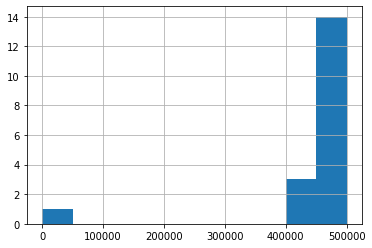

In [41]:
data['last_price'].hist(range=(0, 5e+05))

Остальные предложения стартуют от 400 тыс.руб. - это вполне похоже на реальную стоимость, поэтому оставляем их.

Медиана составляет 4,65 млн.руб., а среднее арифмитическое 6,54 (т.е. больше почти в 1,5 раза), что говорит о присутствии в выборке аномально больших значений. 

<AxesSubplot:>

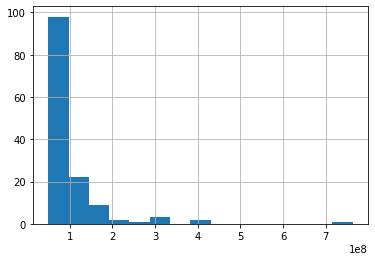

In [42]:
# Посмотрим на графике распределение предложений со стоимостью квартир более 50 млн.руб.
data['last_price'].hist(bins=15, range=(5e+07, 7.63e+08))

В диапазоне от 50 до 100 млн.руб. почти 100 квартир - их оставим для дальнейшего анализа. После отметки в 100 млн.руб. резкий спад предложений, поэтому их можно безболезненно удалить.

In [43]:
# Удаляем выбросы - квартиры дороже 100 млн. и дешевле 12190 руб. включительно
print('Кол-во строк с аномальными данными: ' + str(data.query('(1.219e+04>=last_price) | (last_price>=1e+08)')['last_price'].count()))
data = data.query('1.219e+04<last_price<1e+08')

Кол-во строк с аномальными данными: 38


В столбце __total_area__ максимальная площадь недвижимости составляет 900 кв.м, при условии, что 3-ий квартиль = 69.9 кв.м  
Разброс очень велик, посмотрим на графике распределение

<AxesSubplot:>

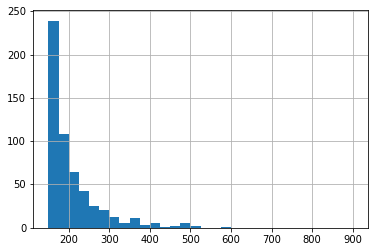

In [44]:
# На графике квартиры общей площадью более 150 кв.м
data['total_area'].hist(bins=30, range=(150, 900))

После отметки в 300 кв.м кол-во предложений незначительное - удалим из анализа столь редкие варианты

In [45]:
print('Кол-во строк с аномальными данными: ' + str(data.query('total_area >= 300')['total_area'].count()))
data = data.query('total_area<300')

Кол-во строк с аномальными данными: 47


В столбце __rooms__ минимальное значение 0 и это, как выснили ранее, либо квартиры со свободной планировкой, либо студии. А максимальное - 19 комнат, что выглядит аномалией. На графике исследуем предложения, в которых более 6-ти комнат

<AxesSubplot:>

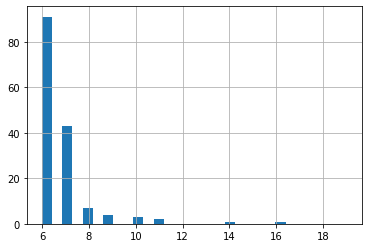

In [46]:
data['rooms'].hist(bins=30, range=(6, 19))

Судя по графику, квартиры с 6-ю и 7-ю комнатами все же встречаются, а уже 8 и более комнат носят единичный характер - очистим данные от них.

In [47]:
print('Кол-во строк с аномальными данными: ' + str(data.query('rooms >= 8')['rooms'].count()))
data = data.query('rooms<8')

Кол-во строк с аномальными данными: 18


В столбце __ceiling_height__ минимальное значение составляет 1 метр, что не может быть действительностью, т.к. согласно СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные» в многоквартирных домах России потолок должен быть не ниже 2,5 м

In [48]:
# Посчитаем кол-во квартир с потоками ниже 2,5 м
data.query('ceiling_height<2.5')['ceiling_height'].count()

73

In [49]:
# Удаляем 73 квартиры, в которых потолки не соответствуют нормам СНиП
data = data.query('ceiling_height >= 2.5')

Максимальное значение в столбце ceiling_height составляет 100 м - тоже выглядит неправдоподобным. Детальнее изучим данные. 

In [50]:
# посчитаем кол-во квартир с потолками от 35 до 100 м включительно
print('Кол-во квартир с потолками от 35 м до 100 м (включительно): ' + str(data.query('35 < ceiling_height <= 100')['ceiling_height'].count()))
print('Кол-во квартир с потолками от 25 м (включительно) до 35 м: ' + str(data.query('25 <= ceiling_height < 35')['ceiling_height'].count()))
print('Кол-во квартир с потолками от 6 м до 25 м: ' + str(data.query('6 < ceiling_height < 25')['ceiling_height'].count()))
print('Кол-во квартир с потолками 2.5-6 м (включительно): ' + str(data.query('2.5 <= ceiling_height <= 6')['ceiling_height'].count()))

Кол-во квартир с потолками от 35 м до 100 м (включительно): 1
Кол-во квартир с потолками от 25 м (включительно) до 35 м: 19
Кол-во квартир с потолками от 6 м до 25 м: 9
Кол-во квартир с потолками 2.5-6 м (включительно): 23494


(2.5, 6.0)

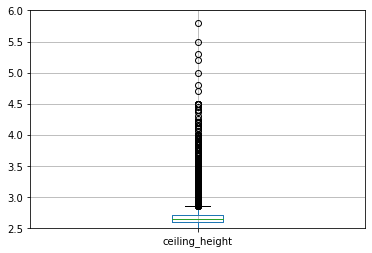

In [51]:
# Для квартир с потолками от 2.5 до 6 м построим диаграмму размаха
import matplotlib.pyplot as plt
data.boxplot('ceiling_height')
plt.ylim(2.5, 6)

На графике наглядно показано, что предложения на квартиры с потолками выше 4.5 м (до 6 м) являются единичными. Такие аномалии можно удалить.
Также необходимо удалить квартиру с потолком 100 м и квартиры с потолками от 6 м до 25 м

In [52]:
# Оставляем для дальнейшего анализа квартиры с потолками до 4.5 м, а также в диапазоне от 25 до 35 м
print('Кол-во строк с аномальными данными: ' + str(data.query('(4.5<ceiling_height<25) | (ceiling_height>=35)')['ceiling_height'].count()))
data = data.query('(ceiling_height<=4.5) | (25<=ceiling_height<35)')

Кол-во строк с аномальными данными: 17


В квартирах с потолками от 25 м до 35 м, вероятно, была пропущена точка, отделяющая целую часть от дробной, и в действительности такие потолки меньше в 10 раз. Исправим данную ошибку

In [53]:
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 35), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 35), 'ceiling_height'] / 10

В столбце __floors_total__ максимальное значение составляет 60 этажей. Проанализируем с помощью диаграммы размаха аномалии

<AxesSubplot:>

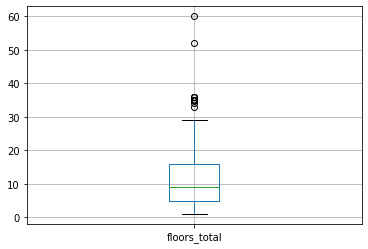

In [54]:
data.boxplot('floors_total')

Согласно диаграмме присутствует небольшое кол-во выбросов с предложениями квартир в домах, имеющих более 30 этажей. Удалим их из выборки.

In [55]:
# Оставляем предложения на квартиры в домах, имеющих кол-во этажей менее 30 или неизвестное 
print('Кол-во строк с аномальными данными: ' + str(data.query('floors_total >= 30')['floors_total'].count()))
data = data.loc[(data['floors_total'] < 30) | (data['floors_total'].isna())]

Кол-во строк с аномальными данными: 31


Для исследования данных в столбце __living_area__ построим диаграмму размаха.

<AxesSubplot:>

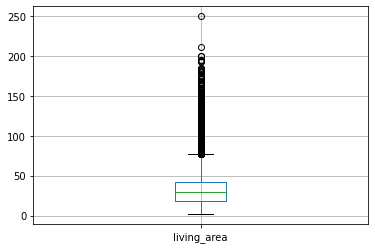

In [56]:
data.boxplot('living_area')

На диаграмме видно, что присутствуют аномальные значения - квартиры с площадью более 200 кв.м. Необходимо очистить данные от них.

Теперь проверим, как распределены предложения с жилой площадью до 14 кв.м. Как мы ранее видели (благодаря функции describe), в выборке присутствовали такие аномалии, как квартира с минимальной площадью всего 2 метра

<AxesSubplot:>

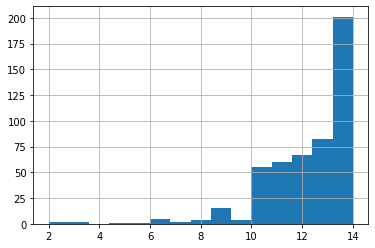

In [57]:
data['living_area'].hist(bins=15, range=(2, 14))

Помимо квартиры с жилой площадью всего 2 метра, есть и другие аномалии с площадью до 10 м - их так же следует удалить

In [58]:
# Удаляем квартиры с жилой площадью меньше 10 м и более 200 м
print('Кол-во строк с аномальными данными: ' + str(data.query('(living_area<10) | (living_area>=200)')['living_area'].count()))
data = data.query('(10 <= living_area < 200)')

Кол-во строк с аномальными данными: 40


Для оценки значений в столбце **floor** построим гистограмму

<AxesSubplot:>

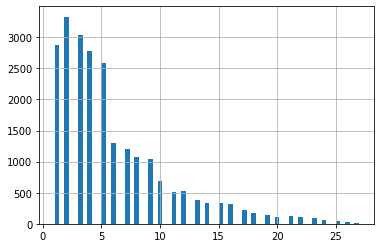

In [59]:
data['floor'].hist(bins=65)

Судя по гистограмме, все квартиры расположены на 1-27 этажах. Выглядит логично, нет нулевых/отрицательных значений и квартир, расположенных выше 30 этажа, т.к. такие строения мы удаляли ранее

In [60]:
# Убедимся с помощью подсчёта в срезе, что аномалий нет
data.query('(floor < 1) | (floor > 27)') ['floor'].count()

0

Для исследования данных в столбце **kitchen_area** построим диаграмму размаха.

<AxesSubplot:>

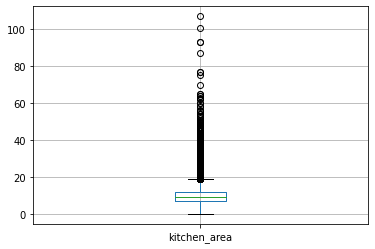

In [61]:
data.boxplot('kitchen_area')

На диаграмме видно присутствие аномальных значений с площадью кухни более 65 кв.м - от них следует избавиться. Также можно заметить достаточное кол-во кухонь площадью около 0 кв.м. Это неудивительно, т.к. в нашей выборке представлены квартиры со свободной планировкой и студии, имеющие нулевые значения. Осталось проверить кухни на наличие аномально малых площадей.  

In [62]:
# Проверим наличие кухонь площадью, не превышающей 1 кв.м (исключив нули)
data.query('0 < kitchen_area <= 1')['kitchen_area'].count()

0

<AxesSubplot:>

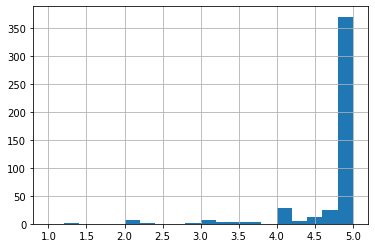

In [63]:
# Посмотрим на распределение предложений с площадями кухонь в диапазоне от 1 до 5 кв.м
data['kitchen_area'].hist(bins=20, range=(1, 5))

Согласно графику предложений с аномально маленькими кухнями до 4 кв.м незначительное кол-во - исключим их из выборки.

In [64]:
# Удаляем кухни меньше 4 кв.м (за исключением нулевых значений) и больше 65
print('Кол-во строк с аномальными данными: ' + str(data.query('(kitchen_area != 0) & (kitchen_area < 4) | (kitchen_area >= 65)')['kitchen_area'].count()))
data = data.query('(kitchen_area == 0) | (4 <= kitchen_area < 65)')

Кол-во строк с аномальными данными: 41


Столбец **balcony** не вызывает особых вопросов, однако максимальное кол-во равно 5 балконам. Посмотрим, является ли данный случай единичным

(0.0, 500.0)

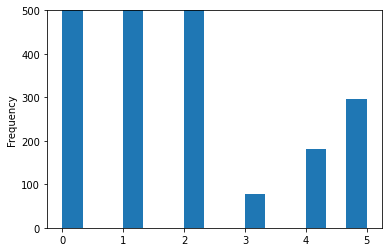

In [65]:
# Построим укрупнённую гистограмму для оценки частоты предложений на квартиры, имеющие более 2-х балконов
data['balcony'].plot(kind='hist', bins=15)
plt.ylim(0, 500)

Как видим из графика, наличие более 2-х балконов вовсе не редкость для недвижимости в Санкт-Петербурге. Посмотрим, есть ли зависимость между общей площадью квартир и кол-вом балконов

<AxesSubplot:xlabel='balcony', ylabel='total_area'>

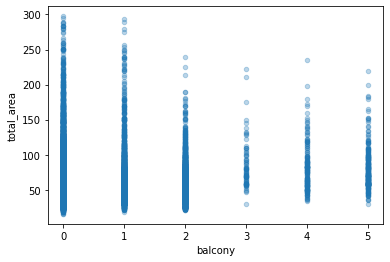

In [66]:
data.plot(kind='scatter', x='balcony', y='total_area', alpha=0.3)

На диаграмме рассеивания видим, что более 2-х балконов имеют вовсе не квартиры, обладающие наибольшей площадью, в них напротив чаще либо отсутствует балкон, либо он единственный. Тем не менее, несмотря на то, что зависимость не выявлена, наличие более 2-х балконов нельзя расценивать, как выбросы, поэтому оставим их. 

В столбце **airports_nearest** настораживает только минимальное значение равное 0. Посмотрим, сколько предложений в непосредственной близости к аэропорту.

(0.0, 50.0)

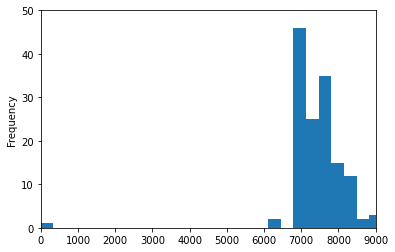

In [67]:
# Построим укрупнённую гистограмму для оценки частоты предложений на квартиры, находящиеся в непосредственной близости к аэропорту
data['airports_nearest'].plot(kind='hist', bins=250)
plt.xlim(0, 9000)
plt.ylim(0, 50)

Есть единственное предложение с квартирой возле аэропорта. Убедимся дополнительно, что это именно квартира, находящаяся на нулевом расстонии 

In [68]:
# Проверим, отсутствуют ли в срезе с расстонием от аэропорта до 1000 м квартиры не с нулевым значением удалённости 
data.query('(airports_nearest < 1000) & (airports_nearest != 0)')['airports_nearest'].count()

0

In [69]:
# Удаляем выброс - квартиру с нулевым расстонием от аэропорта
print('Кол-во строк с аномальными данными: ' + str(data.query('airports_nearest == 0')['airports_nearest'].count()))
data = data.query('airports_nearest != 0')

Кол-во строк с аномальными данными: 1


В столбце **days_exposition** медиана составляет 95 дней, а среднее арифмитическое 180 (т.е. больше почти в 2 раза), что говорит о присутствии в выборке аномально долгих сроков размещения объявлений. Посмотрим на графике их распределение

<AxesSubplot:ylabel='Frequency'>

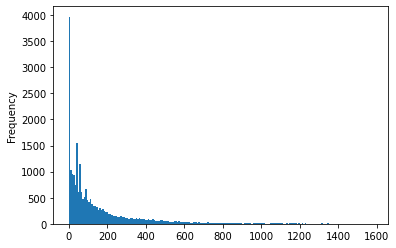

In [70]:
data['days_exposition'].plot(kind='hist', bins=200)

Действительно, есть объявления сроком размещения более 4-х лет. Тем не менее варианты давностью свыше 1200 дней совсем редкие - исключим их из выборки. Стоит также отметить присутствие на графике нескольких пиков в пределах 100 дней, детальнее изучим их 

(0.0, 100.0)

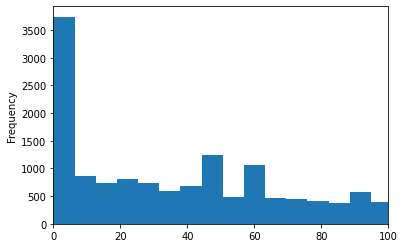

In [71]:
# Построим дополнительную гистограмму для объявлений со сроком размещения до 100 дней
data['days_exposition'].plot(kind='hist', bins=250)
plt.xlim(0, 100)

Помимо основного пика, который обусловлен заменой более 3к пропусков нулевым маркером, также на графике выделяются 3 пика - возможно, это связано с особыми условиями относительно длительности размещения объявлений на площадке. Позднее к ним вернёмся

In [72]:
# Удаляем выбросы - объявления давностью свыше 1200 дней
print('Кол-во строк с аномальными данными: ' + str(data.query('days_exposition >= 1200')['days_exposition'].count()))
data = data.query('days_exposition < 1200')

Кол-во строк с аномальными данными: 91


Картографические данные в столбцах cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, а также значения в столбце total_images не вызывают сомнений и не требуют очистки.

In [73]:
# Выведем число строк, которые остались после очистки данных от аномалий
data.shape[0]

23302

In [74]:
# Сбросим индексацию строк
data.reset_index(drop=True, inplace=True)

**Итого** было удалено 397 строк в следующих столбцах:
- last_price - 38;
- total_area - 47;
- rooms - 18;
- ceiling_height - 90;
- floors_total - 31;
- living_area - 40;
- kitchen_area - 41;
- airports_nearest - 1;
- days_exposition - 91.

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23302 entries, 0 to 23301
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23302 non-null  int64         
 1   last_price            23302 non-null  float64       
 2   total_area            23302 non-null  float64       
 3   first_day_exposition  23302 non-null  datetime64[ns]
 4   rooms                 23302 non-null  int64         
 5   ceiling_height        23302 non-null  float64       
 6   floors_total          23218 non-null  Int64         
 7   living_area           23302 non-null  float64       
 8   floor                 23302 non-null  int64         
 9   is_apartment          23302 non-null  bool          
 10  studio                23302 non-null  bool          
 11  open_plan             23302 non-null  bool          
 12  kitchen_area          23302 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>Комментарий ревьюера v.1</b> 
    
👍 
Раздел сделан хорошо. Проверены основные возможные проблемы в данных.
</div>

### Фич-инжиниринг

Рассчитываем и добавляем в таблицу стоимость одного квадратного метра недвижимости

In [76]:
data['price_square_meter'] = data['last_price'] / data['total_area']

Добавляем в таблицу день публикации объявления

In [77]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Добавляем в таблицу месяц публикации объявления

In [78]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

Добавляем в таблицу год публикации объявления

In [79]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавляем в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)

In [80]:
data['type_floor'] = 'другой'
data.loc[data['floor'] == data['floors_total'], 'type_floor'] = 'последний'
data.loc[data['floor'] == 1, 'type_floor'] = 'первый'

Добавляем в таблицу расстояние в км до центра города

In [81]:
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000)
data['cityCenters_km'] = data['cityCenters_km'].astype('Int64')

In [82]:
# Выведем первые 5 строк обогащённого датасета
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,type_floor,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000,8,False,...,482.0,2,755.0,0,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600,1,False,...,0.0,0,0.0,81,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,100.435,9,False,...,84.0,3,234.0,424,408176.100629,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000,13,False,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8


__Итого__ в таблицу добавлено 6 столбцов: price_square_meter, weekday, month, year, type_floor, cityCenters_km

### Исследовательский анализ данных

#### Описание параметров

In [83]:
round(data.describe(),2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,cityCenters_km
count,23302.00,23302.00,23302.00,23302.00,23302.00,23218.00,23302.00,23302.00,23302.00,23302.00,...,17840.00,17840.00,17840.00,17840.00,23302.00,23302.00,23302.00,23302.00,23302.00,17961.00
mean,9.86,6115802.24,59.04,2.05,2.69,10.67,33.93,5.89,10.26,0.59,...,0.61,216.87,0.76,259.88,151.86,98265.07,2.57,6.40,2017.38,14.28
std,5.67,5862092.57,29.23,1.02,0.21,6.53,19.23,4.86,5.24,0.96,...,0.80,332.96,0.93,325.93,200.76,42382.96,1.79,3.49,1.03,8.62
min,0.00,430000.00,15.50,0.00,2.50,1.00,10.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,7962.96,0.00,1.00,2014.00,0.00
25%,6.00,3400000.00,40.00,1.00,2.60,5.00,18.70,2.00,7.00,0.00,...,0.00,0.00,0.00,0.00,22.00,76500.00,1.00,3.00,2017.00,9.00
50%,9.00,4600000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,...,0.00,0.00,0.00,0.00,73.00,94809.60,3.00,6.00,2017.00,13.00
75%,14.00,6700000.00,69.00,3.00,2.70,16.00,42.10,8.00,11.60,1.00,...,1.00,414.00,1.00,504.00,195.75,113858.11,4.00,10.00,2018.00,16.00
max,50.00,99000000.00,297.50,7.00,4.50,29.00,195.00,27.00,64.00,5.00,...,3.00,3190.00,3.00,1344.00,1199.00,848484.85,6.00,12.00,2019.00,66.00


<AxesSubplot:title={'center':'total_area'}, ylabel='Frequency'>

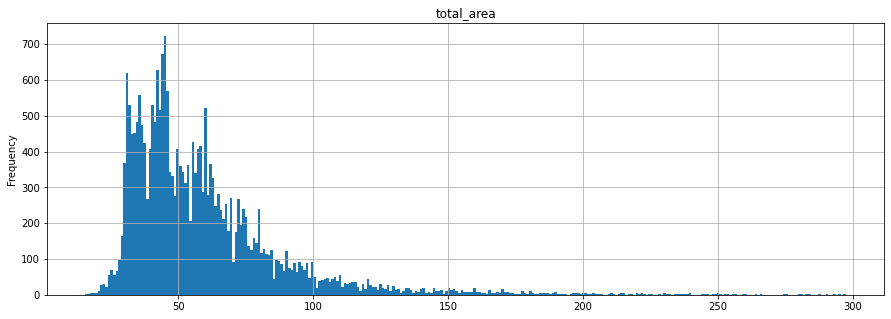

In [84]:
data['total_area'].plot(kind='hist', grid=True, title='total_area', bins=300, figsize=(15,5))

График имеет положительное распределение с длинным хвостом на высоких значениях, что повлияло на среднее арифмитическое (оно составляет 59 кв.м), медиана равна 52. Основная масса квартир (17к объявлений) имеют общую площадь от 30 до 70 кв.м., что соответствует метражу стандартных 1-3-х комнатных квартир. Квартиры более 100 кв.м малопопулярны, вероятно, из-за своей дороговизны. Совсем редко встречаются квартиры площадью менее 25 кв.м или более 200 кв.м

In [85]:
print('Кол-во квартир площадью от 30 до 70 кв.м: ' + str(data.query('30<=total_area<=70')['total_area'].count()))
print('Кол-во квартир площадью более 100 кв.м: ' + str(data.query('100 < total_area <200')['total_area'].count()))
print('Кол-во квартир площадью менее 25 кв.м: ' + str(data.query('total_area<25')['total_area'].count()))
print('Кол-во квартир площадью более 200 кв.м: ' + str(data.query('total_area > 200')['total_area'].count()))

Кол-во квартир площадью от 30 до 70 кв.м: 17104
Кол-во квартир площадью более 100 кв.м: 1562
Кол-во квартир площадью менее 25 кв.м: 162
Кол-во квартир площадью более 200 кв.м: 123


<AxesSubplot:title={'center':'living_area'}, ylabel='Frequency'>

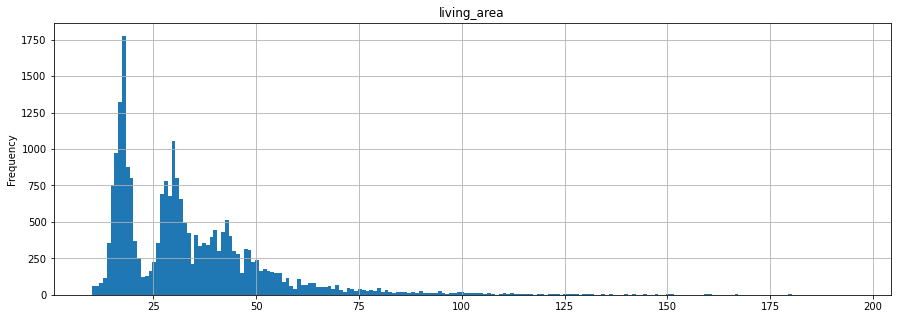

In [86]:
data['living_area'].plot(kind='hist', grid=True, title='living_area', bins=200, figsize=(15,5))

В жилой площади мы наблюдаем 2 пика на отметках 17-18 кв.м и 30-31 кв.м с длинным правым хвостом. Помимо квартир с жилой площадью более 125 кв.м также редко встречаются квартиры менее 12 кв.м При этом отмечается стремительное падение кол-ва предложений на квартиры с жилой площадью 22-23 кв.м. Подобное распределение говорит о возможной ошибке в данных. 

In [87]:
print('Кол-во квартир c жилой площадью от 17 до 18 кв.м: ' + str(data.query('17<=living_area<=18')['living_area'].count()))
print('Кол-во квартир c жилой площадью от 30 до 31 кв.м: ' + str(data.query('30<=living_area<=31')['living_area'].count()))
print('Кол-во квартир c жилой площадью от 23 до 24 кв.м: ' + str(data.query('23<=living_area<=24')['living_area'].count()))
print('Кол-во квартир c жилой площадью менее 12 кв.м: ' + str(data.query('living_area < 12')['living_area'].count()))
print('Кол-во квартир c жилой площадью более 125 кв.м: ' + str(data.query('living_area > 125')['living_area'].count()))

Кол-во квартир c жилой площадью от 17 до 18 кв.м: 2523
Кол-во квартир c жилой площадью от 30 до 31 кв.м: 1437
Кол-во квартир c жилой площадью от 23 до 24 кв.м: 205
Кол-во квартир c жилой площадью менее 12 кв.м: 121
Кол-во квартир c жилой площадью более 125 кв.м: 130


<AxesSubplot:title={'center':'kitchen_area'}, ylabel='Frequency'>

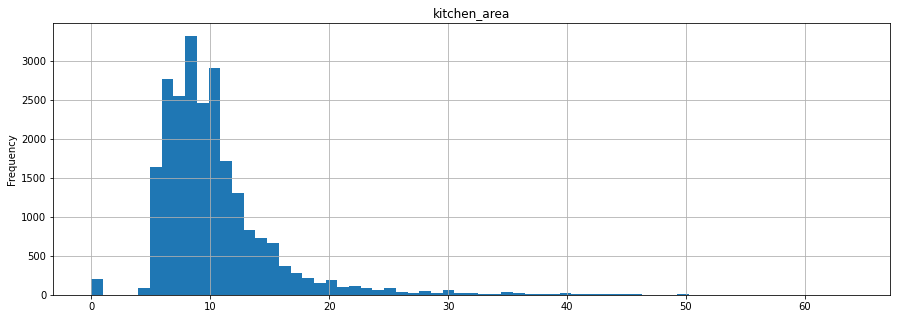

In [88]:
data['kitchen_area'].plot(kind='hist', grid=True, title='kitchen_area', bins=65, figsize=(15,5))

График имеет положительное распределение с хвостом на высоких значениях. Однако в т.ч. благодаря студиям с нулевыми площадями кухонь это не сильно повлияло на среднее арифмитическое (оно составляет 10.26 кв.м), медиана равна 9. Основная масса квартир (20к объявлений) имеют кухню от 5 кв.м (что соовествует минимальному размеру согласно СНиП) до 14. Предложений на студии и квартиры со свободной планировкой, как и квартиры с кухнями более 35 кв.м, совсем немного

In [89]:
print('Кол-во квартир площадью кухни от 5 до 14 кв.м: ' + str(data.query('5<=kitchen_area<=14')['kitchen_area'].count()))
print('Кол-во квартир со свободной планировкой и студий: ' + str(data.query('kitchen_area == 0')['kitchen_area'].count()))
print('Кол-во квартир площадью кухни более 35 кв.м: ' + str(data.query('kitchen_area >= 35')['kitchen_area'].count()))

Кол-во квартир площадью кухни от 5 до 14 кв.м: 19952
Кол-во квартир со свободной планировкой и студий: 202
Кол-во квартир площадью кухни более 35 кв.м: 194


<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

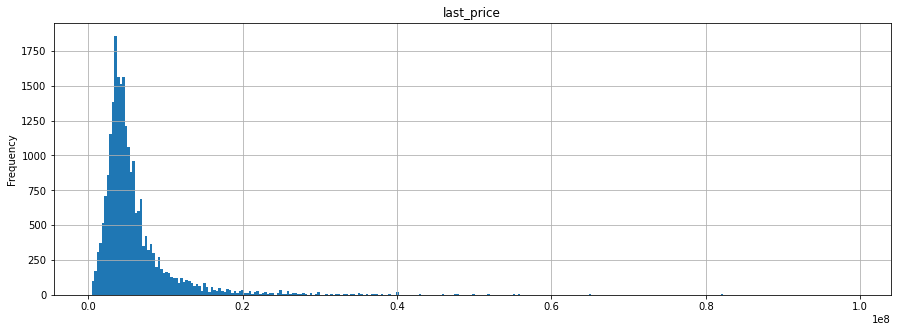

In [90]:
data['last_price'].plot(kind='hist', grid=True, title='last_price', bins=300, figsize=(15,5))

График имеет положительное распределение с длинным хвостом на высоких значениях, что повлияло на среднее арифмитическое (оно составляет более 6.1 млн.руб.), медиана равна 4.6 млн.руб. Половина предложений квартир (11.5к объявлений) имеют стоимость в диапазоне 3.4 до 6.7 млн.руб.  Квартиры дороже 13 млн.руб. малопопулярны. Предложений на квартиры стоимостью менее 1 млн.руб, как и более 30 млн.руб совсем немного

In [91]:
print('Кол-во квартир стоимостью от 3.4 до 6.7 млн.руб.: ' + str(data.query('3.4e+06 < last_price < 6.7e+06')['last_price'].count()))
print('Кол-во квартир стоимостью более 13 млн.руб.: ' + str(data.query('last_price > 1.3e+07')['last_price'].count()))
print('Кол-во квартир стоимостью более 30 млн.руб.: ' + str(data.query('last_price > 3e+07')['last_price'].count()))
print('Кол-во квартир стоимостью менее 1 млн.руб.: ' + str(data.query('last_price < 1e+06')['last_price'].count()))

Кол-во квартир стоимостью от 3.4 до 6.7 млн.руб.: 11562
Кол-во квартир стоимостью более 13 млн.руб.: 1494
Кол-во квартир стоимостью более 30 млн.руб.: 225
Кол-во квартир стоимостью менее 1 млн.руб.: 222


<AxesSubplot:title={'center':'rooms'}, ylabel='Frequency'>

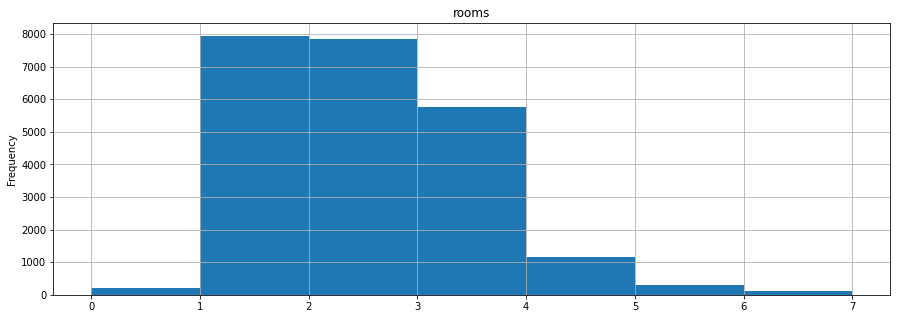

In [92]:
data['rooms'].plot(kind='hist', grid=True, title='rooms', bins=7, figsize=(15,5))

Наибольшую популярность имеют привычные квартиры с 1-3-мя комнатами. Практически равное кол-во предложений (около 8к) на однокомнатные и двухкомнатные квартиры, на 3-х комнатные квартиры меньше примерно на 27%. Предложений на студии, как и квартиры с 6-7-ю комнатами, совсем немного

In [93]:
print('Кол-во квартир с 1-3-мя комнатами: ' + str(data.query('rooms.isin([1,2,3])')['rooms'].count()))
print('Кол-во квартир с 6-7-ю комнатами: ' + str(data.query('rooms.isin([6,7])')['rooms'].count()))
print('Кол-во квартир со свободной планировкой и студий: ' + str(data.query('rooms == 0')['rooms'].count()))

Кол-во квартир с 1-3-мя комнатами: 21523
Кол-во квартир с 6-7-ю комнатами: 130
Кол-во квартир со свободной планировкой и студий: 202


<AxesSubplot:title={'center':'ceiling_height'}, ylabel='Frequency'>

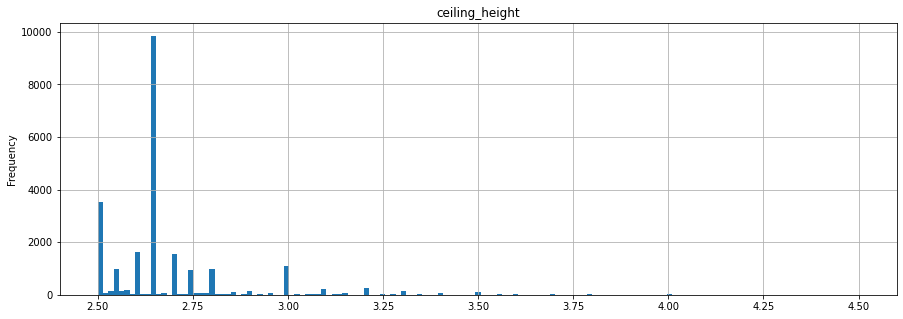

In [94]:
data['ceiling_height'].plot(kind='hist', grid=True, title='ceiling_height', bins=len(data['ceiling_height'].unique()), figsize=(15,5))

In [95]:
print('Кол-во квартир с потолками 2.5-2.8 м: ' + str(data.query('2.5<=ceiling_height <= 2.8')['ceiling_height'].count()))
print('Кол-во квартир с потолками выше 2.8 м, но ниже 3 м: ' + str(data.query('2.8<ceiling_height <3')['ceiling_height'].count()))
print('Кол-во квартир с 3-мя комнатами: ' + str(data.query('ceiling_height > 3')['ceiling_height'].count()))

Кол-во квартир с потолками 2.5-2.8 м: 20377
Кол-во квартир с потолками выше 2.8 м, но ниже 3 м: 421
Кол-во квартир с 3-мя комнатами: 1419


Более 20к предложений на квартиры с потолками в диапазоне 2.5-2.8 м. На графике мы наблюдаем пик на отметке 2.65 м - кол-во предложений достигает почти 10к. Второй пик, значительно менее выраженный, на отметке 2.5 м - 3.5к объявлений. После отметки 2.8 м видим резкий спад и снова рост на значении 3 м - 1к объявлений. Ещё 1.4к предложений с потолками выше 3-х м

<AxesSubplot:title={'center':'floor'}, ylabel='Frequency'>

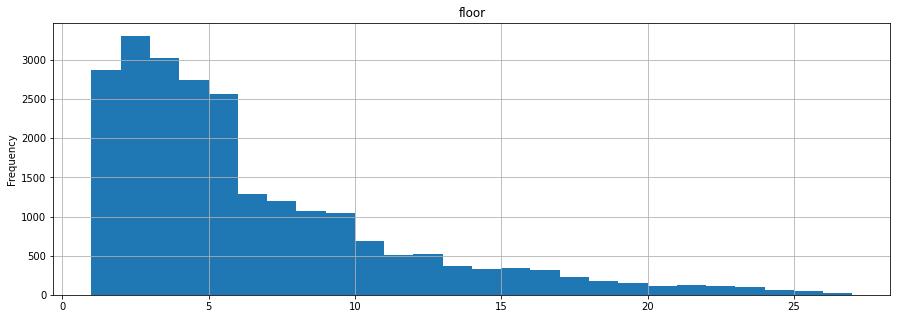

In [96]:
data['floor'].plot(kind='hist', grid=True, title='floor', bins=26, figsize=(15,5))

На графике отчётливо показано, что наибольшее число объявлений составляяют предложения с квартирами, расположенными на 1-5 этажах включительно (14.5к). На квартиры, находящиеся выше 5 этажа, видим сильное снижение предложений, следующий спад приходится на квартиры, расположенные выше 9 этажа. По всей видимости это обусловлено распространенностью в Санкт-Петербурге 5-ти и 9-ти этажных домов. На квартиры выше 16-ого этажа всего 1.4к объявлений

In [97]:
print('Кол-во квартир, расположенных на 1-5 этажах: ' + str(data.query('1<=floor<=5')['floor'].count()))
print('Кол-во квартир, расположенных на 6-9 этажах: ' + str(data.query('6<=floor<=9')['floor'].count()))
print('Кол-во квартир, расположенных выше 16-ого этажа: ' + str(data.query('floor>=16')['floor'].count()))

Кол-во квартир, расположенных на 1-5 этажах: 14522
Кол-во квартир, расположенных на 6-9 этажах: 4590
Кол-во квартир, расположенных выше 16-ого этажа: 1429


<AxesSubplot:>

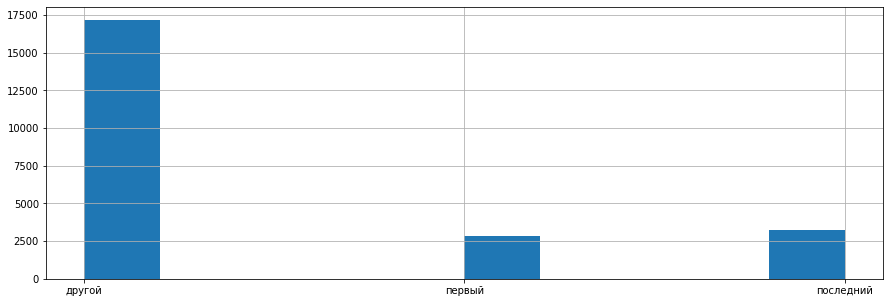

In [98]:
data['type_floor'].hist(figsize=(15,5))

График тип этажа иллюстрирует закономерную картину: подавляющее большинство (более 17к) составляют объявления о продаже квартир, расположенных на этажах, кроме первого и последнего. И в среднем по 3к публикаций приходится на объявления о продаже квартир, находящихся на первом и последнем этажах.

<AxesSubplot:title={'center':'floors_total'}, ylabel='Frequency'>

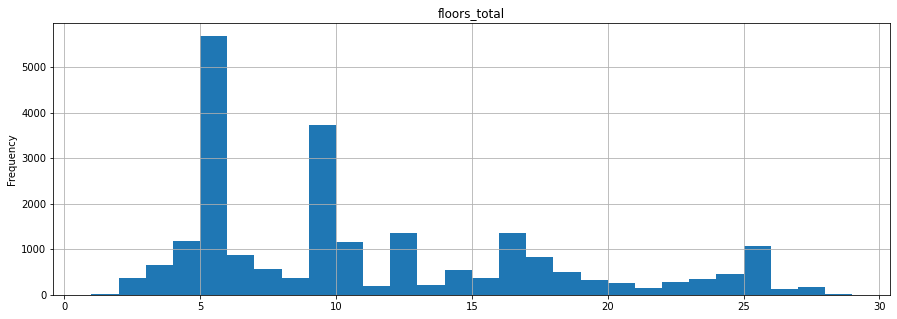

In [99]:
data['floors_total'].plot(kind='hist', grid=True, title='floors_total', bins=28, figsize=(15,5))

Построив график этажности домов, мы убедились, что превалируют 5-ти и 9-ти этажные дома. Более тысячи квартир предлагают в 4-х или 10-ти этажных домах. Также по 1.5к квартир в домах на 12 и 14 этажей. Среди высоток выделяется пик с предложением более 1к квартир в 25-ти этажных домах.

<AxesSubplot:title={'center':'cityCenters_nearest'}, ylabel='Frequency'>

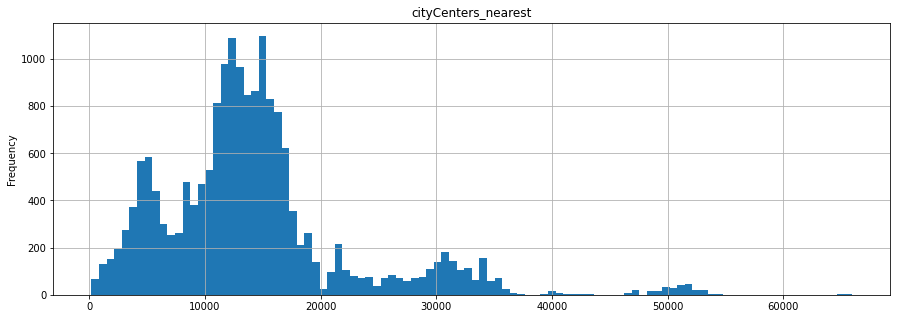

In [100]:
data['cityCenters_nearest'].plot(kind='hist', grid=True, title='cityCenters_nearest', bins=100, figsize=(15,5))

На графике удалённости недвижимости от центра мы наблюдаем 2 пика: первый на расстоянии 11-16 км (более 7к объявлений) и второй - поменьше 4-6 км (свыше 1.5к предложений). При этом видим существенное снижение на отметках 6.5-8 км (<600 квартир) и следующий спад после 20 км. Затем рост в районе 30 км и совсем незначительные колебания на 50 км. Недвижимость дальше 36 км в объявлениях носит крайне редкий характер. 

In [101]:
print('Кол-во квартир, расположенных на расстоянии 11-16 км от центра: ' + str(data.query('11000<cityCenters_nearest<16000')['cityCenters_nearest'].count()))
print('Кол-во квартир, расположенных на расстоянии 4-6 км от центра: ' + str(data.query('4000<cityCenters_nearest<6000')['cityCenters_nearest'].count()))
print('Кол-во квартир, расположенных на расстоянии 6.5-8 км от центра: ' + str(data.query('6500<cityCenters_nearest<8000')['cityCenters_nearest'].count()))
print('Кол-во квартир, расположенных дальше 36 км от центра: ' + str(data.query('cityCenters_nearest>36000')['cityCenters_nearest'].count()))

Кол-во квартир, расположенных на расстоянии 11-16 км от центра: 7210
Кол-во квартир, расположенных на расстоянии 4-6 км от центра: 1609
Кол-во квартир, расположенных на расстоянии 6.5-8 км от центра: 592
Кол-во квартир, расположенных дальше 36 км от центра: 339


<AxesSubplot:title={'center':'airports_nearest'}, ylabel='Frequency'>

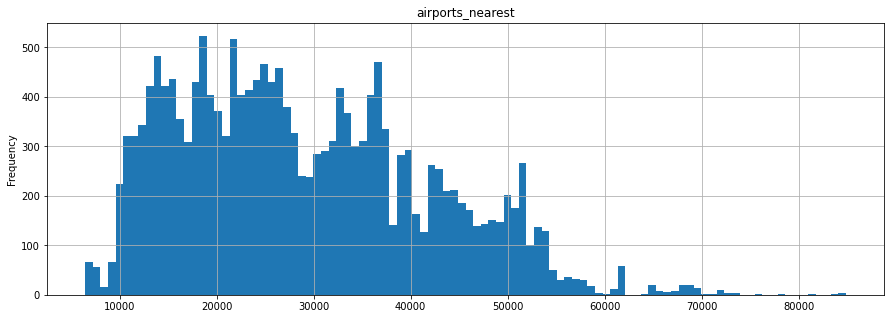

In [102]:
data['airports_nearest'].plot(kind='hist', grid=True, title='airports_nearest', bins=100, figsize=(15,5))

На графике удалённости недвижимости от аэропорта мы видим множественные колебания. В целом же можно отметить небольшое кол-во предложений на квартиры, как в относительной близости к аэропорту, так максимально удалённых. Ближе 10к км от аэропорта расположено всего 305 квартир из нашего датасета, при этом ближайшая из них находится на расстоянии 6450 км. Предложений на квартиры дальше 55к км от аэропорта так же совсем немного - только 341 объявление было размещено на площадке Яндекс Недвижимость.

In [103]:
print('Кол-во квартир, расположенных ближе 10к км от аэропорта: ' + str(data.query('airports_nearest<10000')['airports_nearest'].count()))
print('Расстояние в км от ближашей к аэропорту квартиры: ' + str(data['airports_nearest'].min()))
print('Кол-во квартир, расположенных дальше 55к км от аэропорта: ' + str(data.query('airports_nearest>55000')['airports_nearest'].count()))

Кол-во квартир, расположенных ближе 10к км от аэропорта: 305
Расстояние в км от ближашей к аэропорту квартиры: 6450.0
Кол-во квартир, расположенных дальше 55к км от аэропорта: 341


<AxesSubplot:title={'center':'parks_nearest'}, ylabel='Frequency'>

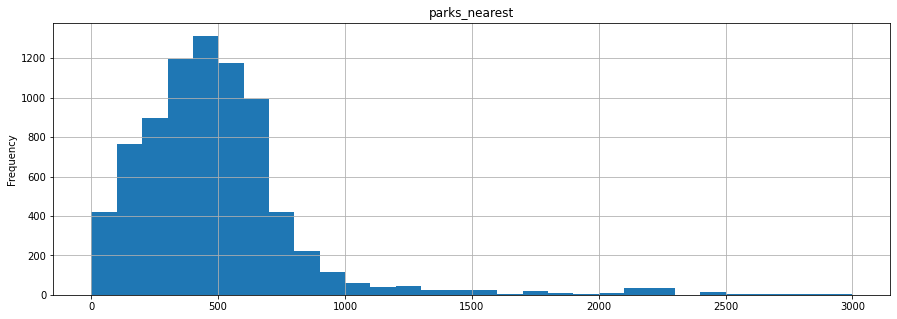

In [104]:
data['parks_nearest'].plot(kind='hist', grid=True, title='parks_nearest', bins=30, figsize=(15,5), range=(1,3000))

На графике мы видим, что среди предложений на недвижимость, в радиусе 3 км от которой, есть парки наибольшее число квартир (более 6к) расположены от парка на расстоянии 100-700 м. Пик приходится на диапазон 400-500 м. С удалённостью боллее 1 км предложений немного - всего 367 квартир. Основная масса объявлений приходится на предложения о продаже недвижимости, в радиусе 3 км от которой, парки отсутствуют.

In [105]:
print('Кол-во квартир, расположенных на расстоянии 200-700 м от парка: ' + str(data.query('100<parks_nearest<700')['parks_nearest'].count()))
print('Кол-во квартир, расположенных дальше 1 км от парка: ' + str(data.query('parks_nearest>1000')['parks_nearest'].count()))
print('Кол-во квартир без парков в радиусе 3 км: ' + str(data.query('parks_nearest==0')['parks_nearest'].count()))

Кол-во квартир, расположенных на расстоянии 200-700 м от парка: 6322
Кол-во квартир, расположенных дальше 1 км от парка: 367
Кол-во квартир без парков в радиусе 3 км: 9956


<AxesSubplot:title={'center':'weekday'}, ylabel='Frequency'>

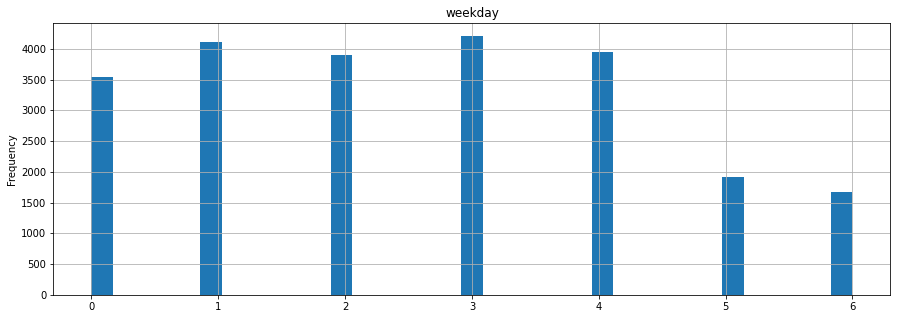

In [106]:
data['weekday'].plot(kind='hist', grid=True, title='weekday', bins=35, figsize=(15,5))

График говорит о том, что объявления публикуется в будние дни примерно вдвое чаще, чем по выходным. В будние дни наименее активным является понедельник, а в выходные - воскресенье. 

In [107]:
print('Среднее кол-во публикаций объявлений по будням: ' + str(data.query('weekday.isin([0,1,2,3,4])')['weekday'].count()/5))
print('Среднее кол-во публикаций объявлений по выходным: ' + str(data.query('weekday.isin([5,6])')['weekday'].count()/2))

Среднее кол-во публикаций объявлений по будням: 3944.2
Среднее кол-во публикаций объявлений по выходным: 1790.5


<AxesSubplot:title={'center':'month'}, ylabel='Frequency'>

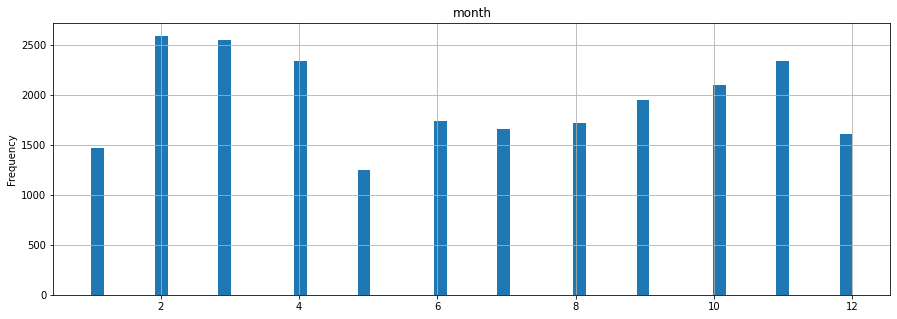

In [108]:
data['month'].plot(kind='hist', grid=True, title='month', bins=60, figsize=(15,5))

На графике мы видим, что рынок недвижимости подвержен определённым сезонным влияниям. Наиболее активным периодом являются февраль-апрель, в мае наблюдается существенный спад - это самый "тихий" месяц в году, затем в июне активность начинает расти и достиет пика в ноябре, после чего снова наступает предпраздничное затишье декабрь-январь.

#### Анализ сроков продажи недвижимости

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

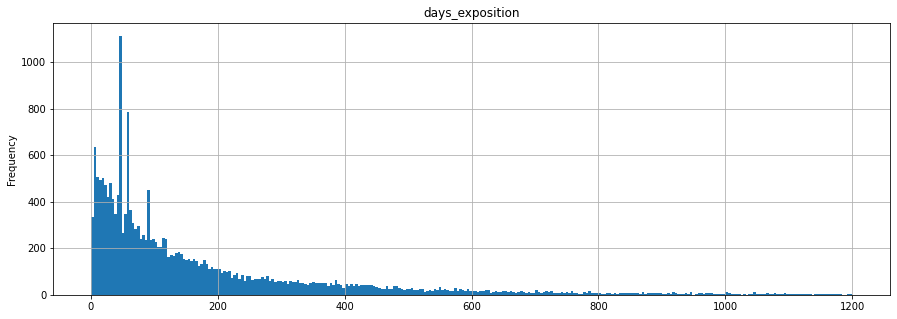

In [109]:
data['days_exposition'].plot(kind='hist', grid=True, title='days_exposition', bins=300, figsize=(15,5), range=(1,1200))

Ранее мы уже замечали присутствие нескольких пиков в объявлениях срок действия которых был менее 100 дней. Посмотрим на них подробнее на масштабированном графике.

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

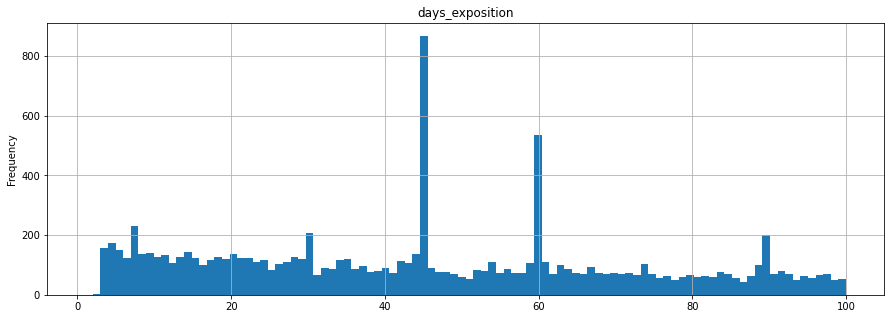

In [110]:
data['days_exposition'].plot(kind='hist', grid=True, title='days_exposition', bins=100, figsize=(15,5), range=(1,100))

На отметке в 45 дней мы наблюдаем наивысший пик - 867 объявлений "провисели" на площадке именно такой срок. Следующий пик приходится на 60 дней - 536 объявлений. Помимо даннных скачков так же присутсвуют пики со средним результатом примерно 200 объявлений на 7-ом (неделя), 30-ом и 90-ом днях.Учитывая, на какие ровные цифры приходятся все эти пики, можно предположить их связь с особенностями условий, касающихся сроков размещения объявлений на сервисе Яндекс Недвижимость.

In [111]:
print('Кол-во объявлений со сроком активности 7 дней: ' + str(data.query('days_exposition==7')['days_exposition'].count()))
print('Кол-во объявлений со сроком активности 30 дней: ' + str(data.query('days_exposition==30')['days_exposition'].count()))
print('Кол-во объявлений со сроком активности 45 дней: ' + str(data.query('days_exposition==45')['days_exposition'].count()))
print('Кол-во объявлений со сроком активности 60 дней: ' + str(data.query('days_exposition==60')['days_exposition'].count()))
print('Кол-во объявлений со сроком активности 90 дней: ' + str(data.query('days_exposition==90')['days_exposition'].count()))

Кол-во объявлений со сроком активности 7 дней: 229
Кол-во объявлений со сроком активности 30 дней: 206
Кол-во объявлений со сроком активности 45 дней: 867
Кол-во объявлений со сроком активности 60 дней: 536
Кол-во объявлений со сроком активности 90 дней: 200


В результате рассчётов медианное значение срока активности объявления составило 73 дня, а среднее значение выше в два раза - 152 дня, что свидетельствует о присутствии в выборке аномально долгих сроков размещения объявлений. Действительно, мы уже отмечали на графике длинный хвост из объявлений многолетней давности. По итогам предобработки максимум находится на отметке 1200 дней (в "сырых" данных было 1580 дней), но это по-прежнему колоссально долгие сроки, приводящие к сильному перекосу в распределении данных. Исходя из текущего состояния выборки, быстрыми можно считать продажи, сроком не превышающем медианное значение, долгими - выше среднего 

In [112]:
print('Среднее значение срока активности объявления: ' + str(round(data['days_exposition'].mean(),0)))
print('Медианное значение срока активности объявления: ' + str(data['days_exposition'].median()))

Среднее значение срока активности объявления: 152.0
Медианное значение срока активности объявления: 73.0


#### Влияние факторов на общую (полную) стоимость объекта

<AxesSubplot:title={'center':'Корреляция стоимости недвижимости и общей площади'}, xlabel='last_price', ylabel='total_area'>

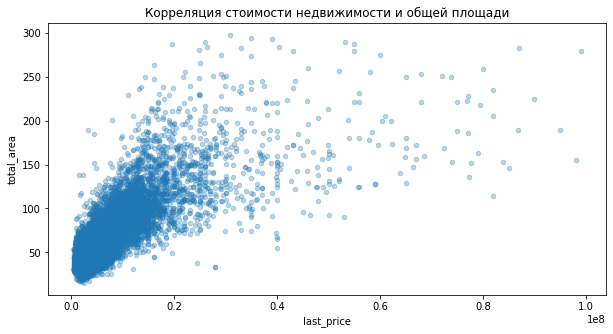

In [113]:
data.plot(kind='scatter', x='last_price', y='total_area', alpha=0.3, figsize=(10,5), \
          title='Корреляция стоимости недвижимости и общей площади')

<AxesSubplot:title={'center':'Корреляция стоимости недвижимости и жилой площади'}, xlabel='last_price', ylabel='living_area'>

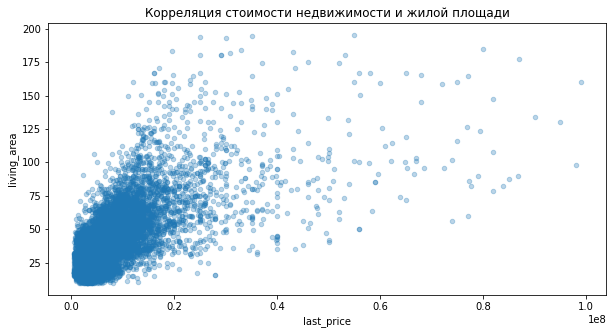

In [114]:
data.plot(kind='scatter', x='last_price', y='living_area', alpha=0.3, figsize=(10,5), \
          title='Корреляция стоимости недвижимости и жилой площади')

<AxesSubplot:title={'center':'Корреляция стоимости недвижимости и площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

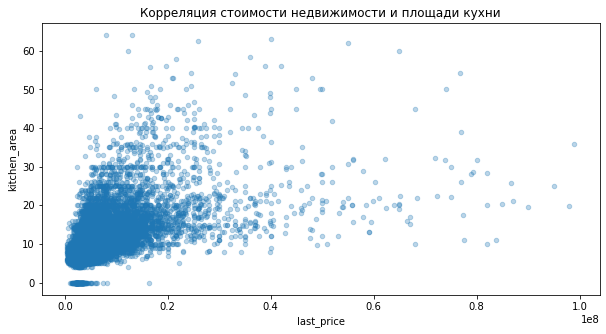

In [115]:
data.plot(kind='scatter', x='last_price', y='kitchen_area', alpha=0.3, figsize=(10,5), \
          title='Корреляция стоимости недвижимости и площади кухни')

<AxesSubplot:title={'center':'Корреляция стоимости недвижимости и кол-ва комнат'}, xlabel='last_price', ylabel='rooms'>

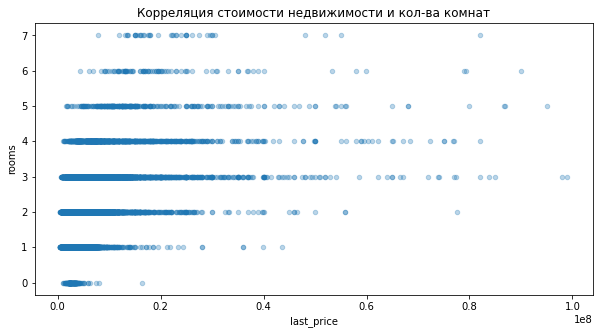

In [116]:
data.plot(kind='scatter', x='last_price', y='rooms', alpha=0.3, figsize=(10,5), \
          title='Корреляция стоимости недвижимости и кол-ва комнат')

<AxesSubplot:title={'center':'Корреляция стоимости недвижимости и типа этажа'}, xlabel='last_price', ylabel='type_floor'>

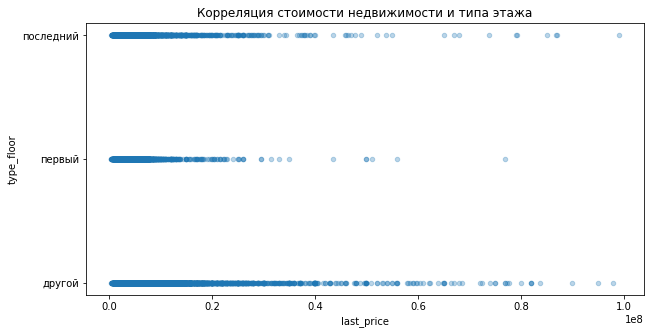

In [117]:
data.plot(kind='scatter', x='last_price', y='type_floor', alpha=0.3, figsize=(10,5), \
          title='Корреляция стоимости недвижимости и типа этажа')

<AxesSubplot:title={'center':'Корреляция стоимости недвижимости и дня недели публикации объявления'}, xlabel='last_price', ylabel='weekday'>

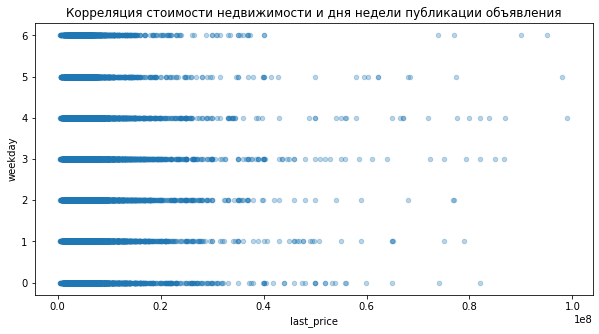

In [118]:
data.plot(kind='scatter', x='last_price', y='weekday', alpha=0.3, figsize=(10,5), \
          title='Корреляция стоимости недвижимости и дня недели публикации объявления')

<AxesSubplot:title={'center':'Корреляция стоимости недвижимости и месяца публикации объявления'}, xlabel='last_price', ylabel='month'>

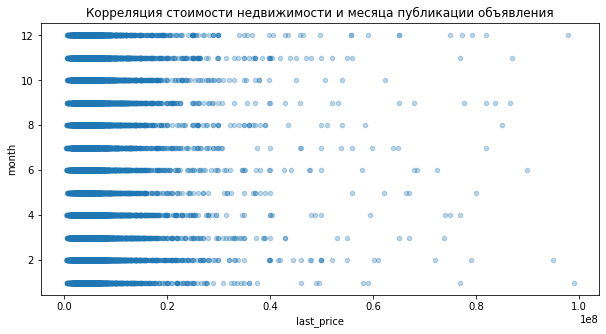

In [119]:
data.plot(kind='scatter', x='last_price', y='month', alpha=0.3, figsize=(10,5), \
          title='Корреляция стоимости недвижимости и месяца публикации объявления')

<AxesSubplot:title={'center':'Корреляция стоимости недвижимости и года публикации объявления'}, xlabel='last_price', ylabel='year'>

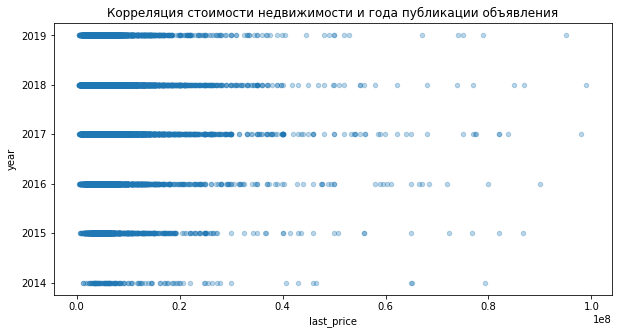

In [120]:
data.plot(kind='scatter', x='last_price', y='year', alpha=0.3, figsize=(10,5), \
          title='Корреляция стоимости недвижимости и года публикации объявления')

На основании построенных графиков можем сделать вывод, что самая высокая корреляция наблюдается у целевой переменной (стоимость объекта) и общей площади недвижимости, затем идёт жилая площадь и площадь кухни. Корреляция целевой переменной и параметра кол-во комнат говорит о наличии связи, однако не слишком сильной. Связь между ценой недвижимости и такими параметрами, как тип этажа, день недели, месяц и год либо отсутствует, либо имеет более сложный, не линейный характер.

Для оценки корреляции в цифрах рассчитаем коэффициент Пирсона

In [121]:
# Для рассчёта коэффициента Пирсона создадим дополнительный столбец, в котором тип этажа преобразуем в числовое значение
data['type_floor_numeric'] = data['type_floor'].replace( ['первый', 'другой', 'последний'], [1, 2, 3])

In [122]:
print('Коэффициент Пирсона цена и общая площадь: ' + str(round(data['last_price'].corr(data['total_area']),2)))
print('Коэффициент Пирсона цена и жилая площадь: ' + str(round(data['last_price'].corr(data['living_area']),2)))
print('Коэффициент Пирсона цена и площадь кухни: ' + str(round(data['last_price'].corr(data['kitchen_area']),2)))
print('Коэффициент Пирсона цена и кол-во комнат: ' + str(round(data['last_price'].corr(data['rooms']),2)))
print('Коэффициент Пирсона цена и тип этажа: ' + str(round(data['last_price'].corr(data['type_floor_numeric']),2)))
print('Коэффициент Пирсона цена и день недели: ' + str(round(data['last_price'].corr(data['weekday']),2)))
print('Коэффициент Пирсона цена и месяц: ' + str(round(data['last_price'].corr(data['month']),2)))
print('Коэффициент Пирсона цена и год: ' + str(round(data['last_price'].corr(data['year']),2)))

Коэффициент Пирсона цена и общая площадь: 0.75
Коэффициент Пирсона цена и жилая площадь: 0.67
Коэффициент Пирсона цена и площадь кухни: 0.57
Коэффициент Пирсона цена и кол-во комнат: 0.46
Коэффициент Пирсона цена и тип этажа: 0.06
Коэффициент Пирсона цена и день недели: -0.01
Коэффициент Пирсона цена и месяц: 0.01
Коэффициент Пирсона цена и год: -0.05


#### Средняя цена одного квадратного метра в ТОП-10 населённых пунктов

In [123]:
# Создаём группировку по населённым пунктам с агрегациями среднего по столбцу с ценой одного квадратного метра и подсчётом кол-в
# по любому, полностью заполненному, столбцу. Сортируем по убыванию частоты с округлением и выводим первые 10 строк
data.groupby('locality_name').agg({'price_square_meter':'mean', 'total_area':'count'}) \
.sort_values(by='total_area', ascending=False).round(2).head(10)

,price_square_meter,total_area
locality_name,,
Санкт-Петербург,113244.26,15407
поселок Мурино,85576.68,552
поселок Шушары,78577.01,438
Всеволожск,68735.60,396
Пушкин,103132.10,360
Колпино,75352.48,336
поселок Парголово,90132.51,325
Гатчина,68746.15,307
деревня Кудрово,92473.55,299


Среди 10 населённых пунктов с наибольшим кол-вом объявлений самая высокая цена за кв.м в Санкт-Петербурге, а самая низкая - в Выборге

#### Средняя цена недвижимости в Санкт-Петербурге на каждом километре

<AxesSubplot:xlabel='cityCenters_km'>

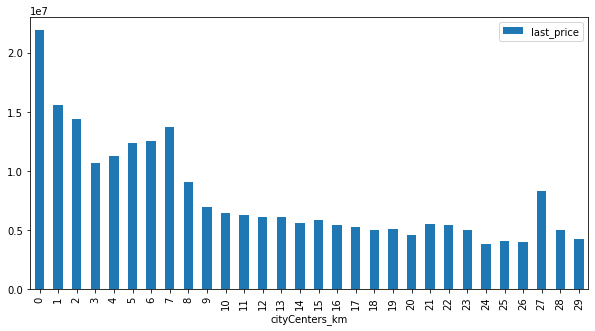

In [124]:
data.loc[data['locality_name']=='Санкт-Петербург'].groupby('cityCenters_km').agg({'last_price':'mean'}).plot(kind='bar', figsize=(10,5))

Ожидаемо, чем дальше квартира находится от центра, тем она дешевле. Недвижимость в непосредственной близости к центру самая дорогая, её средняя стоимость составляет более 2 млн.руб. Максимально удалённую можно приобрести по цене ниже 0.5 млн.руб. Однако на 27 км мы наблюдаем пик с ценой в районе 800+ тыс.руб., если он не является выбросом, то это либо более престижное жильё, либо район. Но также на графике присутствует ещё одна особенность: после снижения на 3-ем км снова начинается рост до отметки 7-ого км, а затем довольно крутой спад. Чем именно обусловленны данные колебания сложно предположить, требуется более углублённый анализ. 

### Общий вывод

Было проведено исследование данных сервиса Яндекс.Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Цель исследования - подготовить данные для дальнейшего построения автоматизированной системы, определяющей рыночную стоимость объектов недвижимости, которая позволит отследить аномалии и мошенническую деятельность. Для анализа предоставлялся датасет из 23699 строк, в котором мы провели предоброботку данных, устранив пропущенные значения, преобразовав типы данных, устранив неявные дубликаты и очистив от аномалий, обогатили дополнительными признаками, изучили и описали параметры, определили корреляции в данных.

__На этапе заполнения пропусков были обработаны следующие столбцы:__
- ceiling_height - 9195 пропусков заполнены медианным значением;
- living_area - 1903 пропуска заполнены с применением к общей площади медианного значачения коэффициента (соотношение площадей жилой к общей)  в зависимости от кол-ва комнат;
- is_apartment - 20924 пропуска заменены на False;
- kitchen_area - 2278 пропусков из которых 2200 заполнены с применением к общей площади медианного значачения коэффициента (соотношение площади кухни к общей) в зависимости от кол-ва комнат и ещё 208 с нулевым кол-вом комнат заменены на 0;
- balcony - 11519 пропусков заменены на 0;
- airports_nearest - 148 пропусков заполнены медианными значениями по каждому населённому пункту;
- cityCenters_nearest - 125 пропусков заполнены медианными значениями по каждому населённому пункту;
- parks_nearest - 10102 пропуска, для которых проставлены нулевые расстояния;
- ponds_nearest - 9071 пропуск, для которых проставлены нулевые расстояния;
- days_exposition - 3181 пропуск отмечен нулевым маркером.

__Изменены типы данных в следующих столбцах:__

- first_day_exposition (дата публикации) - datetime;
- is_apartment (апартаменты) - булев тип;
- floors_total (всего этажей в доме), balcony (число балконов), parks_around3000 (число парков в радиусе 3 км), ponds_around3000 (число водоёмов в радиусе 3 км), days_exposition (сколько дней было размещено объявление) - целые числа.

__Устранены 46 неявных дубликатов__

__Удалены аномалии в следующих столбцах:__

- last_price - 38 квартир дороже 100 млн. и дешевле 12190 руб. включительно;
- total_area - 47 квартир общей площадью более 300 кв.м включительно;
- rooms - 18 квартир с кол-вом комнат более 7;
- ceiling_height - 90 квартир с потоками ниже 2,5 м или выше 4.5 м (исправлены опечатки в потолках от 25 м до 35 м);
- floors_total - 31 квартира в домах, имеющих более 30 этажей;
- living_area - 40 квартир с жилой площадью меньше 10 м и более 200 м;
- kitchen_area - 41 квартира с кухнями меньше 4 кв.м (за исключением нулевых значений) и больше 65;
- airports_nearest - 1 квартира с нулевым расстонием от аэропорта;
- days_exposition - 91 квартира с давностью объявлений о продаже свыше 1200 дней.

__Итого: 397 строк__

__Сгененерированы следующие дополнительные признаки:__
- price_square_meter - стоимость одного квадратного метра недвижимости;
- weekday - день публикации объявления;
- month - месяц публикации объявления;
- year - год публикации объявления;
- type_floor - тип этажа квартиры.

__Изучены параметры:__
- total_area имеет положительное распределение с длинным хвостом на высоких значениях. Основная масса квартир (17к объявлений) имеют общую площадь от 30 до 70 кв.м. Совсем редко встречаются квартиры площадью менее 25 кв.м или более 200 кв.м;
- living_area в жилой площади мы наблюдаем 2 пика на отметках 17-18 кв.м и 30-31 кв.м с длинным хвостом на высоких значениях. Подобное распределение говорит о возможной ошибке в данных;
- kitchen_area имеет положительное распределение. Основная масса квартир (20к объявлений) имеют кухню от 5 кв.м до 14. Предложений на студии и квартиры со свободной планировкой, как и квартиры с кухнями более 35 кв.м, совсем немного (~200);
- last_price имеет положительное распределение с длинным хвостом на высоких значениях, что повлияло на среднее арифмитическое (оно составляет более 6.1 млн.руб.), медиана равна 4.6 млн.руб. Предложений на квартиры стоимостью менее 1 млн.руб, как и более 30 млн.руб совсем немного (~220);
- rooms в 21.5к предложений с кол-вом от 1-ой до 3-х. Практически равное кол-во объявлений (около 8к) на однокомнатные и двухкомнатные квартиры, на 3-х комнатные квартиры меньше примерно на 27%;
- ceiling_height с учётом заполнения медианным значением (2.65 м) более 9к строк в подавляющим числе предложений (более 20к) соответствует диапозону от 2.5 до 2.8 м;
- floor с учётом распространенности в Санкт-Петербурге 5-ти и 9-ти этажных домов в 14.5к предложений соответствует уровням с 1-ого по 5-ый и ещё в 4.5к - с 6-ого по 9-ый;
- type_floor закономерно в более 17к объявлений является "другим" (не первым и не последним). И в среднем по 3к вариантов на первом и последнем этажах;
- cityCenters_nearest имеет 2 пика: первый на расстоянии 11-16 км (более 7к объявлений) и второй - поменьше 4-6 км (свыше 1.5к предложений). Существенное снижение на отметках 6.5-8 км (<600 квартир) и следующий спад после 20 км. Недвижимость дальше 36 км в объявлениях носит крайне редкий характер;
- airports_nearest имеет множественные колебания в распределении. В целом же можно отметить небольшое кол-во предложений (в среднем 320) на квартиры, как в относительной близости к аэропорту, так максимально удалённых;
- parks_nearest среди предложений на недвижимость, в радиусе 3 км от которой, есть парки в наибольшем числе предложений (более 6к) соответсвует расстоянию 100-700 м. Пик приходится на диапазон 400-500 м. Основная масса объявлений (10к) приходится на предложения о продаже недвижимости, в радиусе 3 км от которой, парки отсутствуют;
- weekday имеет ожидаемую статистику: в будние дни объявления публикуется примерно вдвое чаще, чем по выходным. В будние дни наименее активным является понедельник, а в выходные - воскресенье;
- month отражает подверженность рынка недвижимости определённым сезонным влияниям. Наиболее активным периодом являются февраль-апрель, май - самый "тихий" месяц в году, следующее предпраздничное затишье декабрь-январь.

__Пронализированы сроки продажи недвижимости:__
- отмечены аномальные пики, вызванные, вероятно, особенностями условий, касающихся сроков размещения объявлений на сервисе Яндекс.Недвижимость, на значениях 45 дней (867 объявлений) и 60 (более 500 объявлений), а также 7, 15 и 90 по ~200 объявлений;
- определены быстрые продажи, как совершённые в течение 73 дней (до уровня медианы), и долгие - свыше 152 дней (превышающие среднее). Однако столь большой разборс значений медианы и среднего арифмитического говорит о сильном перекосе в распределении данных. Что является следствием присутствия в выборке аномально долгих сроков размещения объявлений, максимум находится на отметке 1200 дней.
Результаты исследовательского анализа данных показывают необходимость проведения допольнительной очистки от аномалий.

__Определены коррелляции признаков:__  
Самая высокая корреляция выявлена между целевой переменной (стоимость объекта) и общей площадью недвижимости, затем идёт жилая площадь и площадь кухни.  
Рассчитан коэффициент Пирсона для целевой переменной и следующих признаков:
- total_area: 0.75;
- living_area: 0.67;
- kitchen_area: 0.57;
- rooms: 0.46.

__Рассчитана средняя цена одного квадратного метра в 10 населённых пунктах__ с наибольших кол-вом предложений. Закономерно самые высокие цены в мегаполисе и крупных городах. Первое место занимает Санкт-Петербург - 113к, замыкает десятку Выборг - 58к

__Рассчитана средняя цена недвижимости в Санкт-Петербурге на каждом километре__   
Стандартно недвижимость в непосредственной близости к центру самая дорогая, её средняя стоимость составляет более 2 млн.руб. Максимально удалённую можно приобрести по цене ниже 0.5 млн.руб. Отмечается пик с ценой в районе 800+ тыс.руб (ценовой уровень 8-ого км) на 27 км - возможно, обоснован престижностью предложений. Также присутствует необъяснимое снижение на 3-ем км, которое сменяется дальнейшимм ростом до отметки 7-ого км.